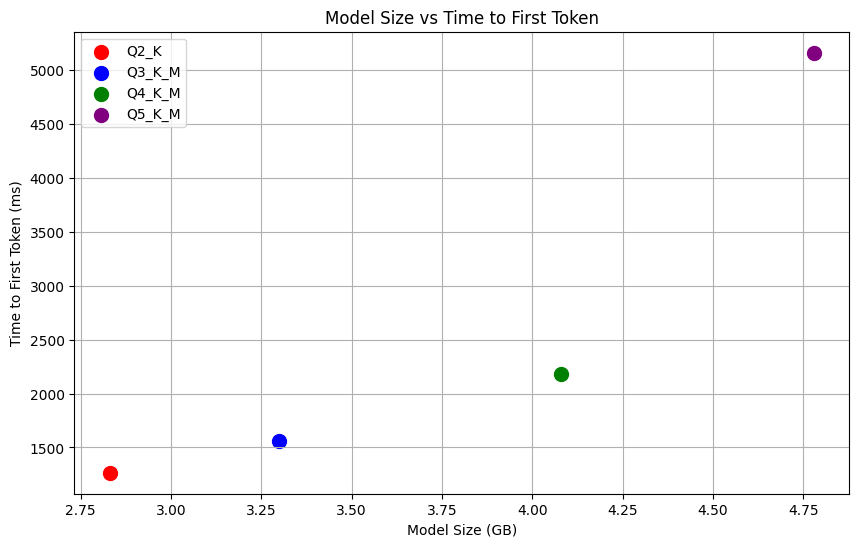

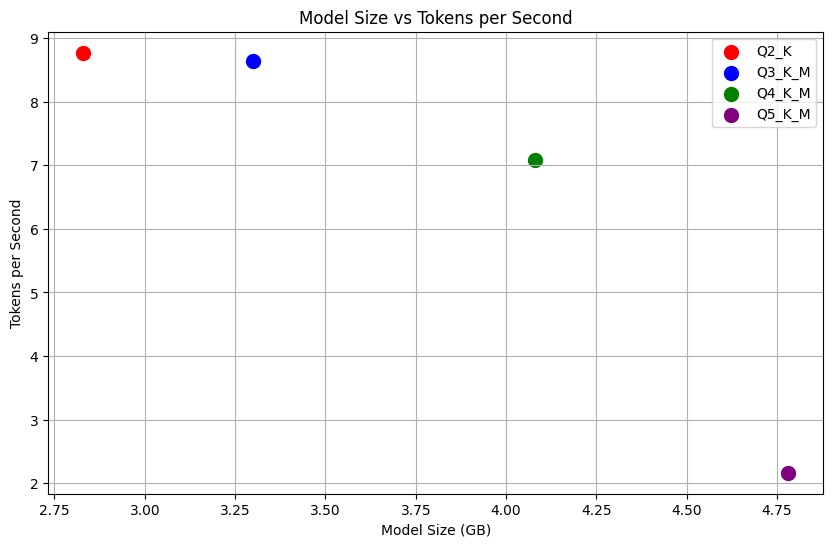

In [4]:
import matplotlib.pyplot as plt

data = {
    "Q2_K": {
        "load_times": [837.97, 2762.81, 927.19, 871.75, 928.69],
        "eval_times": [2173.32, 2521.08, 2302.58, 2436.62, 2483.92],
        "completion_tokens": 32,
    },
    "Q3_K_M": {
        "load_times": [4453.05, 773.47, 954.61, 834.14, 787.75],
        "eval_times": [2165.46, 2114.24, 2117.09, 2190.96, 2137.42],
        "completion_tokens": 32,
    },
    "Q4_K_M": {
        "load_times": [5108.76, 2207.15, 1738.54, 1066.09, 807.89],
        "eval_times": [1443.02, 1446.63, 1656.94, 1425.40, 1443.28],
        "completion_tokens": 26
    },
    "Q5_K_M": {
        "load_times": [7367.90, 4908.30, 5158.25, 4725.28, 3652.64],
        "eval_times": [8958.84, 7004.23, 5493.86, 3071.73, 5965.05],
        "completion_tokens": (26*4+18)/5 # Different number of average completion tokens, less than max. One of the times it was 18 instead of 26, calculation simplified.
    }
}

average_results = {}

for model, values in data.items():

    avg_load_time = sum(values["load_times"]) / len(values["load_times"])
    
    total_times = [load_time + eval_time for load_time, eval_time in zip(values["load_times"], values["eval_times"])]
    avg_total_time = sum(total_times) / len(total_times)

    completion_tokens_per_second = values["completion_tokens"] / (avg_total_time / 1000)

    average_results[model] = {
        "average_time_to_first_token": avg_load_time,
        "average_completion_tokens_per_second": completion_tokens_per_second
    }

models = ['Q2_K', 'Q3_K_M', 'Q4_K_M', 'Q5_K_M']
model_sizes_gb = [2.83, 3.30, 4.08, 4.78]
time_to_first_token_ms = [average_results[model]['average_time_to_first_token'] for model in models]
tokens_per_second = [average_results[model]['average_completion_tokens_per_second'] for model in models]
colors = ['red', 'blue', 'green', 'purple'] 


plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.scatter(model_sizes_gb[i], time_to_first_token_ms[i], color=colors[i], s=100, label=models[i])
plt.xlabel('Model Size (GB)')
plt.ylabel('Time to First Token (ms)')
plt.title('Model Size vs Time to First Token')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.scatter(model_sizes_gb[i], tokens_per_second[i], color=colors[i], s=100, label=models[i])
plt.xlabel('Model Size (GB)')
plt.ylabel('Tokens per Second')
plt.title('Model Size vs Tokens per Second')
plt.legend()
plt.grid(True)

plt.show()